In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/results.csv')
df

,Unnamed: 0,generated_compound_index,generated_smiles,molmim_qed_score,starting_molecule,DSMBind_predictions
0,0,0,CC(C)(C)[C@@H](NC(=O)C(F)(F)F)C(=O)N1CCc2ncccc21,0.903354,Nirmatrelvir,-1196891.750
1,1,1,CC(C)(C)[C@@H](NC(=O)C(F)(F)F)C(=O)N1CCc2ncccc21,0.903354,Nirmatrelvir,-1401404.500
2,2,2,CC(C)(C)[C@@H](NC(=O)C(F)(F)F)C(=O)N1CCc2ncccc21,0.903354,Nirmatrelvir,-1231866.500
3,3,3,CC(C)(C)[C@@H](NC(=O)C(F)(F)F)C(=O)N1CCOc2ccccc21,0.896814,Nirmatrelvir,-1160064.125
4,4,4,CC(C)(C)[C@@H](NC(=O)C(F)(F)F)C(=O)N1CCOc2ccccc21,0.896814,Nirmatrelvir,-1504411.250
5,5,0,Cn1cnc(Cn2c(CO)nc(C3CC3)c2Br)n1,0.920698,Ensitrelvir,-1562578.500
6,6,1,Cn1cnc(Cn2c(CO)nc(C3CC3)cc2=O)c1,0.863028,Ensitrelvir,-1567559.375
7,7,2,CC[C@H](C)c1nc(Cl)c2nc(C3CC3)cn2n1,0.840436,Ensitrelvir,-1562036.625
8,8,3,Cn1cnc(Cn2c(=O)nc(C3CC3)c(C(=O)O)c2Cl)n1,0.831735,Ensitrelvir,-1528728.625
9,9,4,Cn1cnc(Cn2c(Cl)cnc(C3CC3)c2=O)n1,0.828827,Ensitrelvir,-1394867.625


In [6]:
def calculate_c(row):
    if row['starting_molecule'] == 'Nirmatrelvir':
        return 1
    if row['starting_molecule'] == 'Ensitrelvir':
        return 2
    if row['starting_molecule'] == 'Molnupiravir':
        return 3
    else:
        return 0

In [7]:
df['Round'] = df.apply(calculate_c, axis=1)

In [15]:
threshold = -1400000
df['Is_Below_Threshold'] = np.where(df['DSMBind_predictions'] < threshold, 1, 0)

df


,Unnamed: 0,generated_compound_index,generated_smiles,molmim_qed_score,starting_molecule,DSMBind_predictions,Round,Is_Below_Threshold
0,0,0,CC(C)(C)[C@@H](NC(=O)C(F)(F)F)C(=O)N1CCc2ncccc21,0.903354,Nirmatrelvir,-1196891.750,1,0
1,1,1,CC(C)(C)[C@@H](NC(=O)C(F)(F)F)C(=O)N1CCc2ncccc21,0.903354,Nirmatrelvir,-1401404.500,1,1
2,2,2,CC(C)(C)[C@@H](NC(=O)C(F)(F)F)C(=O)N1CCc2ncccc21,0.903354,Nirmatrelvir,-1231866.500,1,0
3,3,3,CC(C)(C)[C@@H](NC(=O)C(F)(F)F)C(=O)N1CCOc2ccccc21,0.896814,Nirmatrelvir,-1160064.125,1,0
4,4,4,CC(C)(C)[C@@H](NC(=O)C(F)(F)F)C(=O)N1CCOc2ccccc21,0.896814,Nirmatrelvir,-1504411.250,1,1
5,5,0,Cn1cnc(Cn2c(CO)nc(C3CC3)c2Br)n1,0.920698,Ensitrelvir,-1562578.500,2,1
6,6,1,Cn1cnc(Cn2c(CO)nc(C3CC3)cc2=O)c1,0.863028,Ensitrelvir,-1567559.375,2,1
7,7,2,CC[C@H](C)c1nc(Cl)c2nc(C3CC3)cn2n1,0.840436,Ensitrelvir,-1562036.625,2,1
8,8,3,Cn1cnc(Cn2c(=O)nc(C3CC3)c(C(=O)O)c2Cl)n1,0.831735,Ensitrelvir,-1528728.625,2,1
9,9,4,Cn1cnc(Cn2c(Cl)cnc(C3CC3)c2=O)n1,0.828827,Ensitrelvir,-1394867.625,2,0


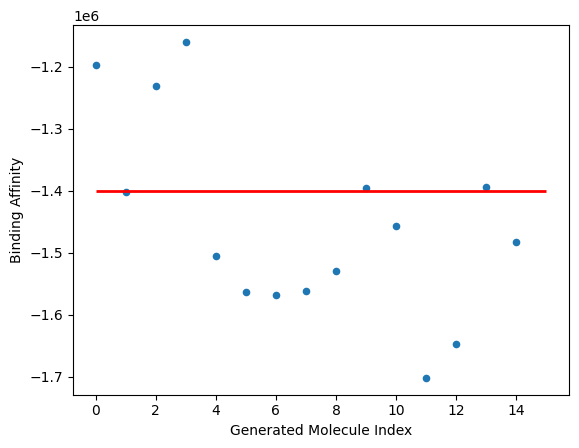

In [12]:
df.plot(kind = 'scatter', x = 'Unnamed: 0', y = 'DSMBind_predictions')
plt.xlabel('Generated Molecule Index')
plt.ylabel('Binding Affinity')
plt.hlines(y=-1400000, xmin=0, xmax=15, linewidth=2, color='r')

plt.show()

In [ ]:
threshold = -1400000